# Importing & installing libraries

In [231]:
import numpy as np
import pandas as pd
import warnings

import matplotlib.pyplot as plt

from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

from tensorflow import keras

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report

# 1-Data Collection

## Load the Data

In [205]:
df = pd.read_csv(r'C:\Users\FARZAM\Desktop\AI\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [206]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# 2-Data Preprocessing

## Data Cleaning and looking for missing values

In [207]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There is not mising values so no need to cleaning also the data labeled into 0 and 1 

## Labeling the data 

In [208]:
All = df.shape[0]
fraud = df[df['Class'] == 1]
nonFraud = df[df['Class'] == 0]

x = len(fraud)/All
y = len(nonFraud)/All

print('frauds :',x*100,'%')
print('non frauds :',y*100,'%')

frauds : 0.1727485630620034 %
non frauds : 99.82725143693798 %


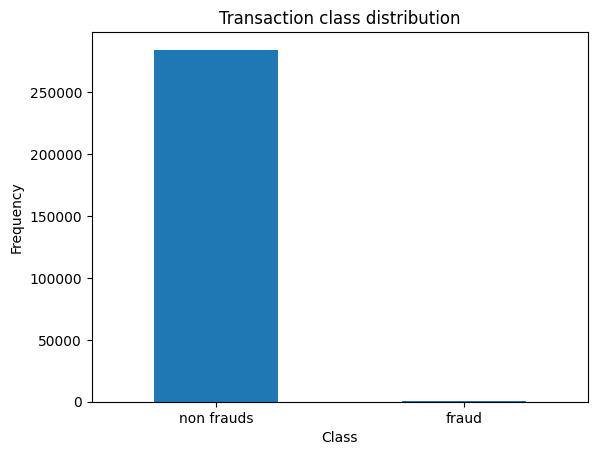

In [209]:
labels = ['non frauds','fraud']
classes = pd.Series(df['Class']).value_counts(sort=True)

classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency");

## Checking for categorical data

Distribution of Amount

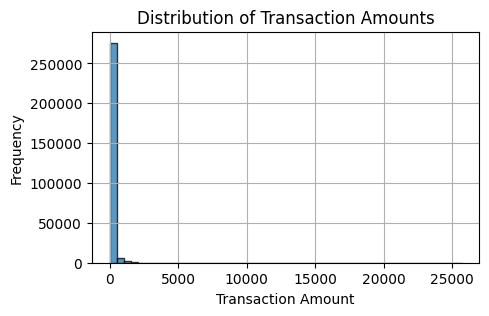

In [210]:
amount = df['Amount'].values

plt.figure(figsize=(5, 3))
plt.hist(amount, bins=50, alpha=0.75, edgecolor='black')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Distribution of Time

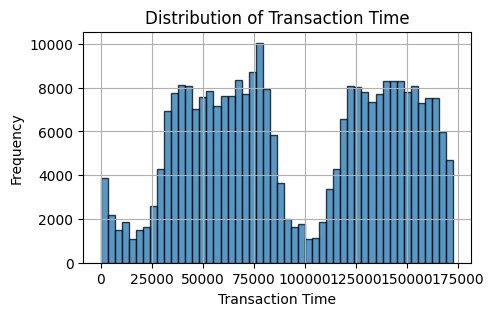

In [211]:
amount = df['Time'].values

plt.figure(figsize=(5, 3))
plt.hist(amount, bins=50, alpha=0.75, edgecolor='black')
plt.title('Distribution of Transaction Time')
plt.xlabel('Transaction Time')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Distribution of anomalous features

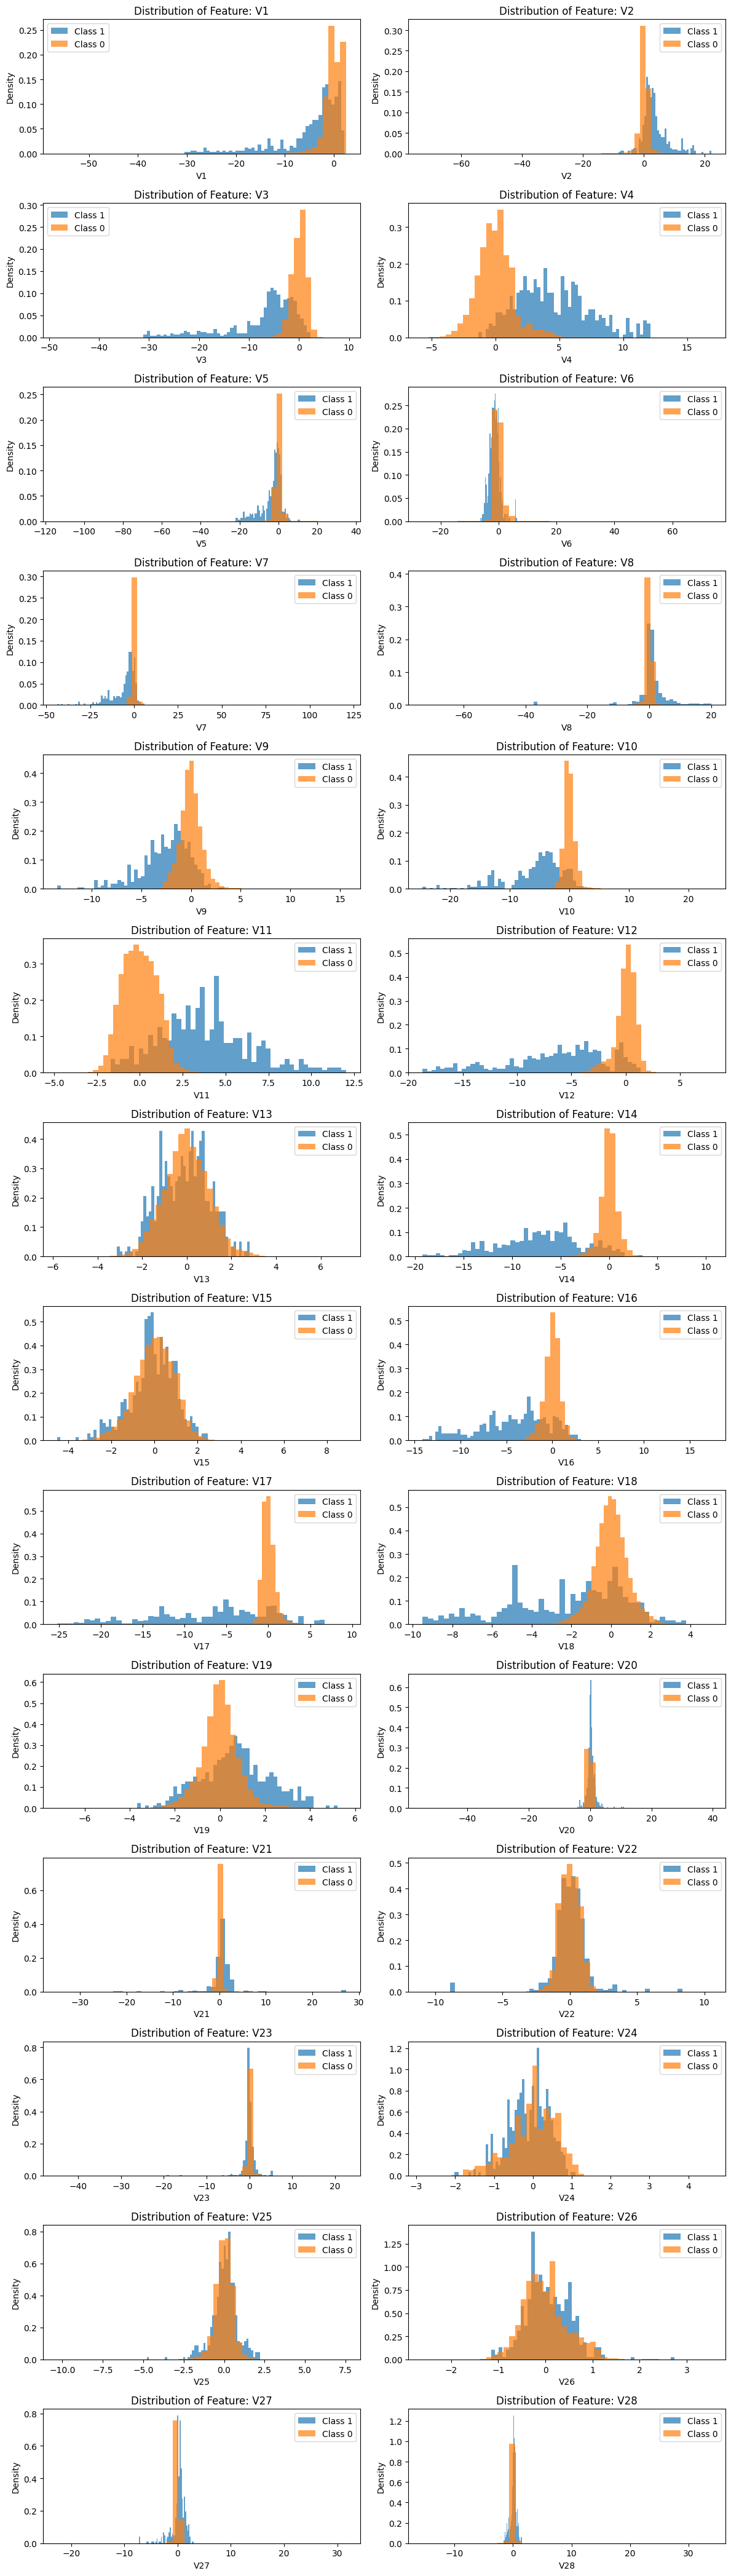

In [212]:
anomalous_features = df.columns[1:29]

num_features = len(anomalous_features)
num_rows = int(np.ceil(num_features / 2))

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 3 * num_rows))

axes = axes.flatten()

for i, feature in enumerate(anomalous_features):
    ax = axes[i] 


    class_1_data = df[df['Class'] == 1][feature]
    class_0_data = df[df['Class'] == 0][feature]

    ax.hist(class_1_data, bins=50, density=True, alpha=0.7, label='Class 1')
    ax.hist(class_0_data, bins=50, density=True, alpha=0.7, label='Class 0')

    ax.set_xlabel(feature)
    ax.set_ylabel('Density')
    ax.set_title(f'Distribution of Feature: {feature}')
    ax.legend()

plt.tight_layout()
plt.show();

In this analysis I will not be dropping any features looking at the distribution of features, because I am still in the learning process of working with data preprocessing in numarous ways.So I would like to experiment step by step on data.

Instead all the features will be tranformed to scaled variables.

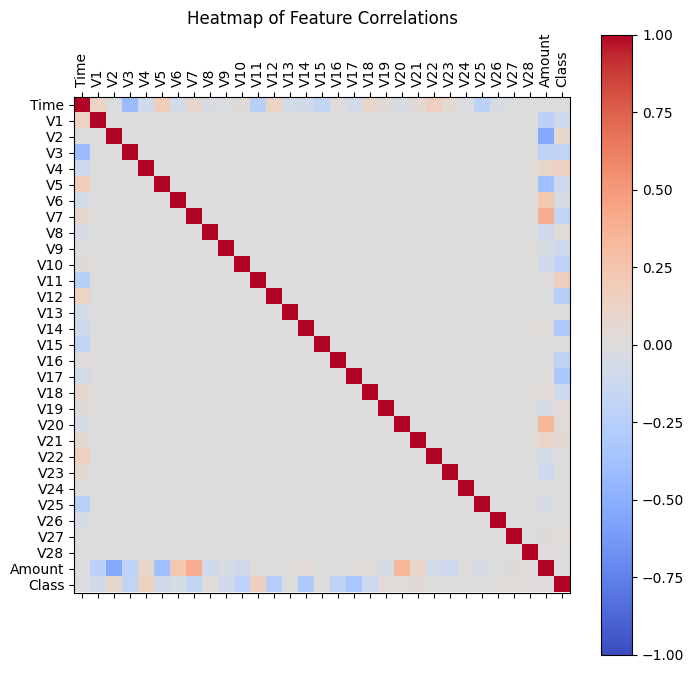

In [213]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 8))
plt.matshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1, fignum=1)
plt.colorbar()

plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

plt.title('Heatmap of Feature Correlations')
plt.show();

## Standardize the data

The dataset is contains only numerical input variables which are the result of a PCA transformation. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. So PCA is effected by scale so we need to scale the features in the data before applying PCA. For the scaling I am using Scikit-learn's StandardScaler(). In order to fit to the scaler the data should be reshaped within -1 nad 1.

In [214]:
df['Vamount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['Vtime'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1,1))

df = df.drop(['Time','Amount'], axis = 1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Vamount,Vtime
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


## PCA transformation
PCA (Principal Component Analysis) mainly using to reduce the size of the feature space while retaining as much of the information as possible. In here all the features transformed into 2 features using PCA.

In [215]:
X = df.drop(['Class'], axis = 1)
y = df['Class']

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X.values)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [216]:
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf.head()

,principal component 1,principal component 2,Class
0,1.571750,-0.675818,0
1,-1.086321,-0.282848,0
2,2.053144,1.077135,0
3,1.150029,-0.427360,0
4,1.143632,-1.342321,0


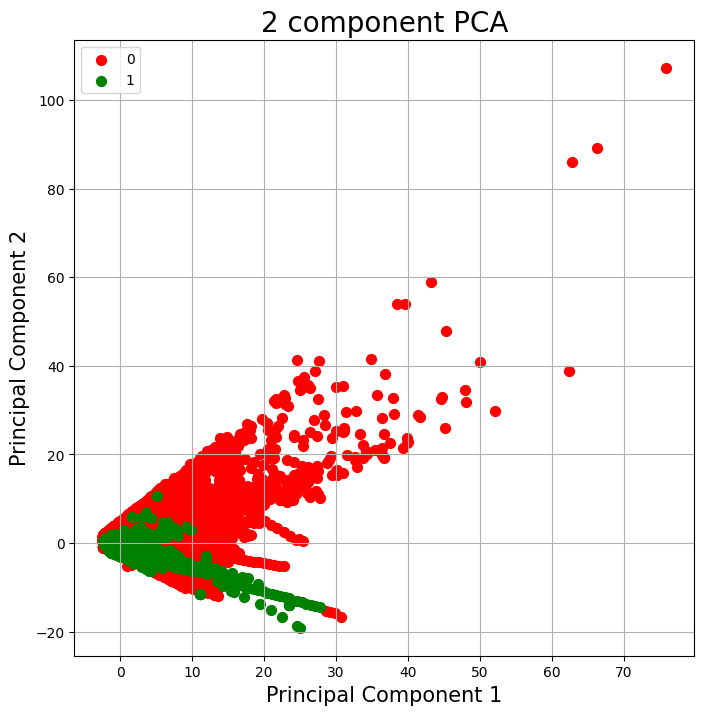

In [217]:
# 2D visualization
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Since the data is highly imbalanced, I am only taking 492 rows from the non_fraud transactions.

Lets shuffle the data before creating the subsamples

In [218]:
df = df.sample(frac=1)

frauds = df[df['Class'] == 1]
non_frauds = df[df['Class'] == 0][:492]

new_df = pd.concat([non_frauds, frauds])

new_df = new_df.sample(frac=1, random_state=42)
new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Vamount,Vtime
88258,-1.644403,3.129852,-2.576977,3.415573,-0.448525,-1.241893,-1.991652,1.002665,-2.809071,-4.153692,...,-0.648576,-0.318617,-0.680413,0.389869,0.055750,0.394682,0.298821,1,-0.326762,-0.689749
28505,-1.297978,1.502666,-0.770601,-1.195543,2.192972,3.128490,-0.161803,1.606783,-1.341680,-0.886946,...,-1.409962,-0.072910,0.976321,0.386920,0.055166,-0.399880,-0.074167,0,-0.342475,-1.258755
76555,-7.901421,2.720472,-7.885936,6.348334,-5.480119,-0.333059,-8.682376,1.164431,-4.542447,-7.748480,...,1.092437,0.320133,-0.434643,-0.380687,0.213630,0.423620,-0.105169,1,0.260317,-0.804199
218486,1.990722,0.670274,-1.057491,3.540051,0.859208,0.082535,0.287461,-0.132425,-1.158612,1.537421,...,0.579195,0.060909,0.467333,0.195676,0.114896,-0.049089,-0.048348,0,-0.353189,0.979597
26651,1.244334,-1.664891,0.192225,-1.477012,-1.369353,0.278289,-1.205853,0.063738,-1.443634,1.336764,...,0.036379,-0.215256,-0.940918,0.325390,-0.024842,0.035003,0.037648,0,0.278468,-1.276739


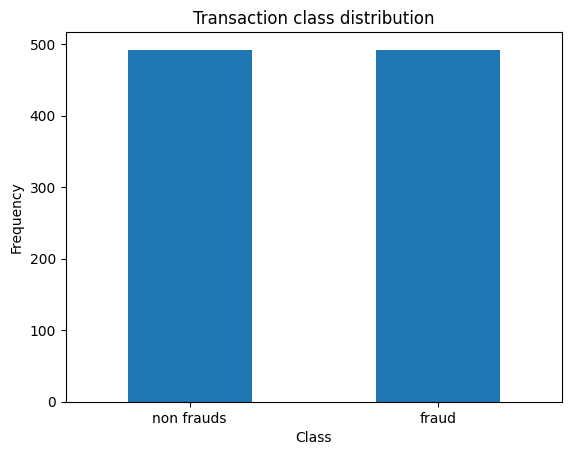

In [219]:
# Let's plot the Transaction class against the Frequency
warnings.simplefilter(action='ignore', category=FutureWarning)
labels = ['non frauds','fraud']
classes = pd.value_counts(new_df['Class'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [236]:
# prepare the data
features = new_df.drop(['Class'], axis = 1)
labels = pd.DataFrame(new_df['Class'])

feature_array = features.values
label_array = labels.values

In [237]:
X_train,X_test,y_train,y_test = train_test_split(feature_array,label_array,test_size=0.20)
X_train = normalize(X_train)
X_test=normalize(X_test)

## KNN model

In [238]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

C:\Users\FARZAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [239]:
neighbours = np.arange(1,25)
train_accuracy =np.empty(len(neighbours))
test_accuracy = np.empty(len(neighbours))

for i,k in enumerate(neighbours):
    #Setup a knn classifier with k neighbors
    knn=KNeighborsClassifier(n_neighbors=k,algorithm="kd_tree",n_jobs=-1)
    
    #Fit the model
    knn.fit(X_train,y_train.ravel())
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train.ravel())
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test.ravel()) 

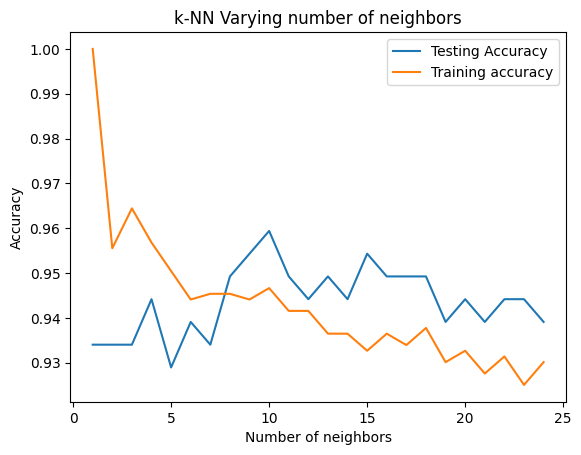

In [240]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbours, test_accuracy, label='Testing Accuracy')
plt.plot(neighbours, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [241]:
idx = np.where(test_accuracy == max(test_accuracy))
x = neighbours[idx]

In [242]:
#k_nearest_neighbours_classification
knn=KNeighborsClassifier(n_neighbors=x[0],algorithm="kd_tree",n_jobs=-1)
knn.fit(X_train,y_train.ravel())

KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1, n_neighbors=10)

## Neural Networks model

In [243]:
nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=800, random_state=42)  
nn.fit(X_train, y_train)
nn_pred = nn.predict(X_test)

C:\Users\FARZAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## K-Means Clustering

In [244]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
kmeans_pred = kmeans.predict(X)

## Principal Component Analysis (PCA)

In [245]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Evaluation 

K-Means has the highest precision (0.90), meaning it makes fewer false positive errors.
Neural Net has the highest recall (0.90), meaning it's best at finding all the actual positives.

Depending on your needs:

Avoid false positives: Choose K-Means.
Find all positives: Choose Neural Net.
Balance: KNN or PCA might be good choices, as their F1-scores are similar.

            Model  Precision    Recall  F1-Score
0             KNN   0.929002  0.928934  0.928871
1  Neural Network   0.964819  0.964467  0.964417
2         K-Means   0.997284  0.473879  0.641325


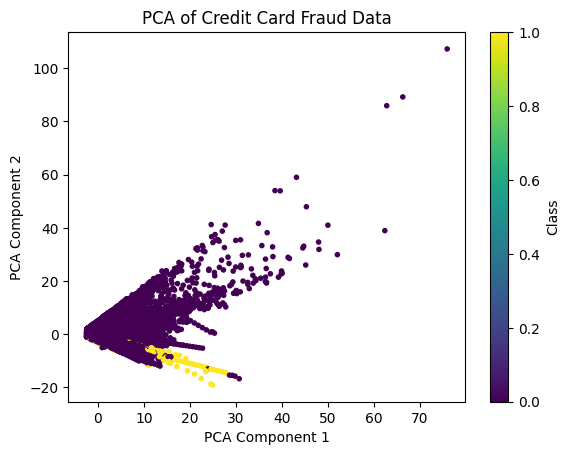

[0.12088206 0.09654333]


In [253]:
knn_report = classification_report(y_test, knn_pred, output_dict=True)
nn_report = classification_report(y_test, nn_pred, output_dict=True)
kmeans_report = classification_report(y, kmeans_pred, output_dict=True)

results = {
    'Model': ['KNN', 'Neural Network', 'K-Means'],
    'Precision': [knn_report['weighted avg']['precision'], nn_report['weighted avg']['precision'], kmeans_report['weighted avg']['precision']],
    'Recall': [knn_report['weighted avg']['recall'], nn_report['weighted avg']['recall'], kmeans_report['weighted avg']['recall']],
    'F1-Score': [knn_report['weighted avg']['f1-score'], nn_report['weighted avg']['f1-score'], kmeans_report['weighted avg']['f1-score']]
}

# Creating a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', marker='.')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Credit Card Fraud Data')
plt.colorbar(label='Class')
plt.show()
pca
print(pca.explained_variance_ratio_)

# Conclusion

The **Neural Network** is the best performer with an F1-score of 0.964 and a recall of 0.964.

The **KNN** is close behind with an F1-score of 0.929 and a recall of 0.929.

The **K-Means** has a high precision but low recall (0.474), resulting in a lower F1-score of 0.641.

F1-score is the balance of precision and recall, with recall measuring the ability to find all relevant instances.

The **Neural Network** is the best model to choose. It has the highest F1-score (0.964) and recall (0.964), indicating it effectively balances precision and recall, making it the most reliable for overall performance.